In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor, AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
%matplotlib inline

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

# Exploratory Data Analysis

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


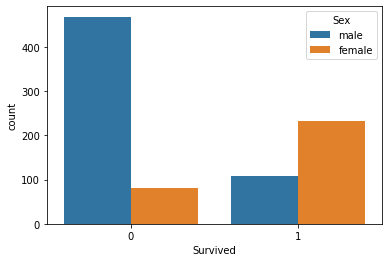

In [6]:
sns.countplot(x='Survived', hue='Sex', data=df_train)

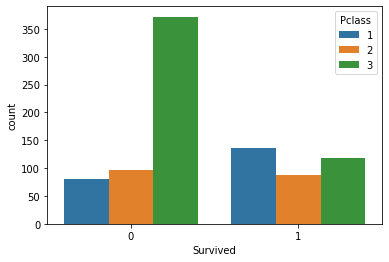

In [7]:
sns.countplot(x='Survived', hue='Pclass', data=df_train)

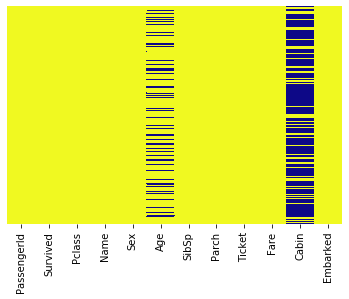

In [8]:
sns.heatmap(df_train.isnull(), cbar=False, yticklabels=False, cmap='plasma_r')

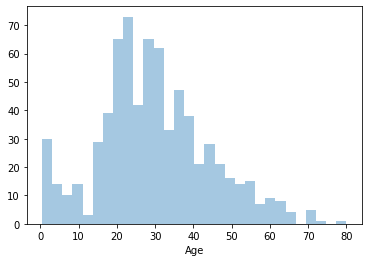

In [9]:
sns.distplot(df_train['Age'].dropna(), kde=False, bins=30)

(array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5]),
 <a list of 10 Text xticklabel objects>)

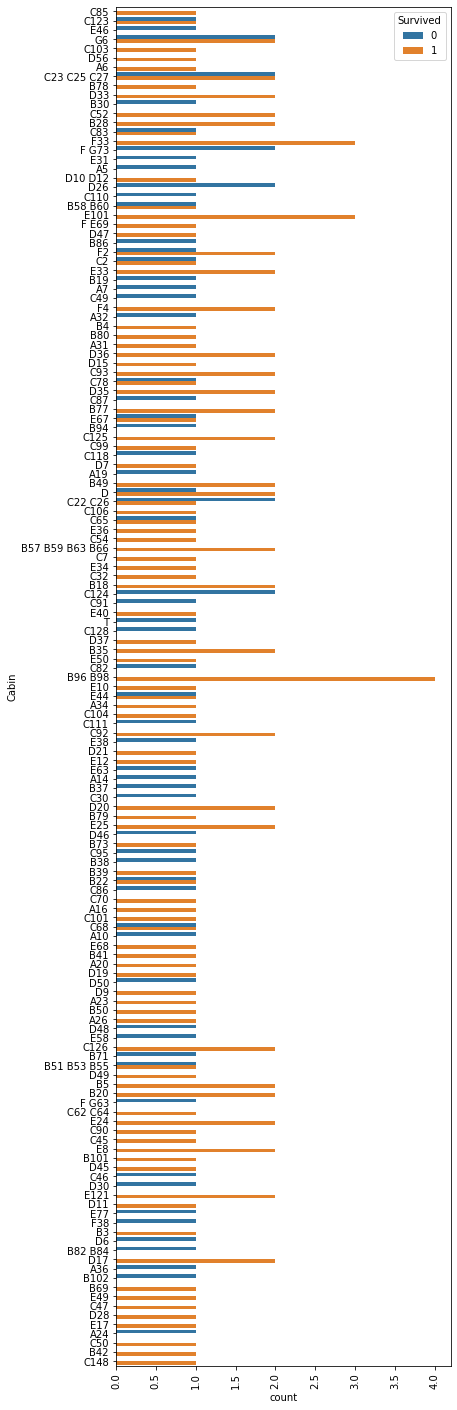

In [10]:
plt.figure(figsize=(6, 25))
sns.countplot(y=df_train['Cabin'].dropna(), hue=df_train['Survived'])
plt.xticks(rotation=90)

In [11]:
df_test['Age'].isnull().value_counts()

False    332
True      86
Name: Age, dtype: int64

In [12]:
df_train['Age'].isnull().value_counts()

False    714
True     177
Name: Age, dtype: int64

In [13]:
df_train[df_train['Age'].isnull() == False].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
sex = pd.get_dummies(df_train['Sex'], drop_first=True)
Embarked = pd.get_dummies(df_train['Embarked'], drop_first=True)
df_train.drop(['Name', 'Ticket', 'Cabin', 'Sex', 'Embarked'], axis=1, inplace=True)
df_train = pd.concat([df_train, sex, Embarked], axis=1)

sex = pd.get_dummies(df_test['Sex'], drop_first=True)
Embarked = pd.get_dummies(df_test['Embarked'], drop_first=True)
df_test.drop(['Name', 'Ticket', 'Cabin', 'Sex', 'Embarked'], axis=1, inplace=True)
df_test = pd.concat([df_test, sex, Embarked], axis=1)

In [15]:
df_train_wAge = df_train[df_train['Age'].isnull() == False]

# df_train_wAge = df_temp.append(df_test[df_test['Age'].isnull() == False], ignore_index=True, sort=True)

df_test_woAge = df_train[df_train['Age'].isnull() == True]

# df_test_woAge = df_temp.append(df_test[df_test['Age'].isnull() == True], ignore_index=True, sort=True)

In [16]:
df_train_wAge.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [17]:
df_test_woAge.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
5,6,0,3,NaN,0,0,8.4583,1,1,0
17,18,1,2,NaN,0,0,13.0000,1,0,1
19,20,1,3,NaN,0,0,7.2250,0,0,0
26,27,0,3,NaN,0,0,7.2250,1,0,0
28,29,1,3,NaN,0,0,7.8792,0,1,0


In [18]:
df_train_wAge[df_train_wAge['Survived'].isnull() == True].head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S


In [19]:
x_Age = df_train_wAge.drop(['Age', 'PassengerId'], axis=1)
y_Age = df_train_wAge['Age']

x_Age_train, x_Age_test, y_Age_train, y_Age_test = train_test_split(x_Age, y_Age, test_size=0.3, random_state=101)

In [20]:
std = StandardScaler()
std.fit(x_Age_train)

x_Age_train = std.transform(x_Age_train)
x_Age_test = std.transform(x_Age_test)

In [21]:
lr = LinearRegression()
lr.fit(x_Age_train, y_Age_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
pred = lr.predict(x_Age_test)

In [23]:
print("Training accuracy: ", round(lr.score(x_Age_train, y_Age_train) *100, 2))
print("Test accuracy: ", round(lr.score(x_Age_test, y_Age_test) *100, 2))

Training accuracy:  26.56
Test accuracy:  27.63


In [24]:
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(x_Age_train, y_Age_train)
KnnPred = knn.predict(x_Age_test)
print("Training accuracy: ", round(knn.score(x_Age_train, y_Age_train) *100, 2))
print("Test accuracy: ", round(knn.score(x_Age_test, y_Age_test) *100, 2))

Training accuracy:  54.9
Test accuracy:  27.14


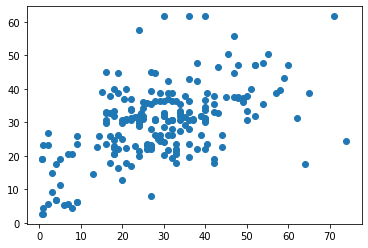

In [25]:
plt.scatter(y_Age_test, KnnPred)

Training accuracy:  72.34
Test accuracy:  20.78


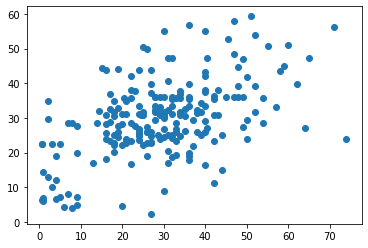

In [26]:
rf = RandomForestRegressor(n_estimators=10, n_jobs=-1)
rf.fit(x_Age_train, y_Age_train)
rfPred = rf.predict(x_Age_test)
print("Training accuracy: ", round(rf.score(x_Age_train, y_Age_train) *100, 2))
print("Test accuracy: ", round(rf.score(x_Age_test, y_Age_test) *100, 2))
plt.scatter(y_Age_test, rfPred)

Training accuracy:  29.63
Test accuracy:  30.1


C:\Users\adars\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


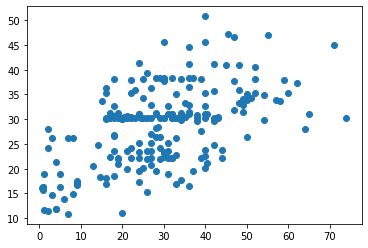

In [27]:
mlp = MLPRegressor()
mlp.fit(x_Age_train, y_Age_train)
mlpPred = mlp.predict(x_Age_test)
print("Training accuracy: ", round(mlp.score(x_Age_train, y_Age_train) *100, 2))
print("Test accuracy: ", round(mlp.score(x_Age_test, y_Age_test) *100, 2))
plt.scatter(y_Age_test, mlpPred)

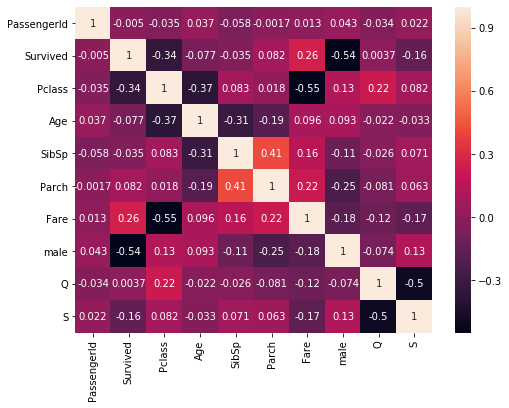

In [28]:
plt.figure(figsize=(8,6))
sns.heatmap(df_train.corr(), annot=True)

Since all the regression models are giving an accuracy of less than 50% we can conclude that the data is not very correlated to the age which we also see in the correaltion matrix above.

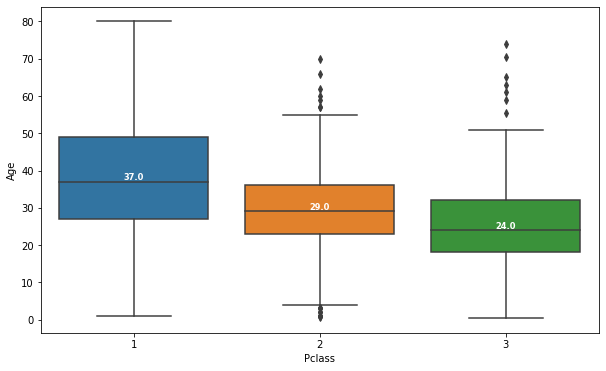

In [29]:
plt.figure(figsize=(10,6))
ax = sns.boxplot(x='Pclass', y='Age', data=df_train)
medians = df_train.groupby(['Pclass'])['Age'].median().values
median_labels = [str(np.round(s, 0)) for s in medians]

pos = range(len(medians))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick], medians[tick] + 0.5, median_labels[tick], 
            horizontalalignment='center', size='small', color='w', weight='semibold')


In [30]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [31]:
df_train['Age'] = df_train[['Age','Pclass']].apply(impute_age,axis=1)
df_train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [32]:
x = df_train.drop(['Survived', 'PassengerId'], axis=1)
y = df_train['Survived']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [33]:
logr = LogisticRegression()
logr.fit(x_train, y_train)
logr_pred = logr.predict(x_test)
accuracy_score(y_test, logr_pred)

C:\Users\adars\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7723880597014925

In [34]:
print(classification_report(y_test,logr_pred))

              precision    recall  f1-score   support

           0       0.77      0.86      0.81       154
           1       0.78      0.65      0.71       114

    accuracy                           0.77       268
   macro avg       0.77      0.76      0.76       268
weighted avg       0.77      0.77      0.77       268



In [35]:
knnC = KNeighborsClassifier(n_neighbors=10)
knnC.fit(X= x_train, y=y_train)
knnC_pred = knnC.predict(x_test)
print(classification_report(y_test,knnC_pred))

              precision    recall  f1-score   support

           0       0.68      0.86      0.76       154
           1       0.71      0.46      0.56       114

    accuracy                           0.69       268
   macro avg       0.70      0.66      0.66       268
weighted avg       0.69      0.69      0.68       268



In [36]:
AdaB = AdaBoostClassifier()
AdaB.fit(x_train, y_train)
AdaB_pred = AdaB.predict(x_test)
print(classification_report(y_test,AdaB_pred))

              precision    recall  f1-score   support

           0       0.76      0.86      0.80       154
           1       0.77      0.63      0.69       114

    accuracy                           0.76       268
   macro avg       0.76      0.74      0.75       268
weighted avg       0.76      0.76      0.76       268



In [37]:
xgb = XGBClassifier()
xgb.fit(x_train, y_train)
xgb_pred = xgb.predict(x_test)
print(classification_report(y_test, xgb_pred))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       154
           1       0.84      0.71      0.77       114

    accuracy                           0.82       268
   macro avg       0.82      0.80      0.81       268
weighted avg       0.82      0.82      0.81       268



In [38]:
lgbc = LGBMClassifier()
lgbc.fit(x_train, y_train)
lgbc_pred = lgbc.predict(x_test)
print(classification_report(y_test, lgbc_pred))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       154
           1       0.86      0.73      0.79       114

    accuracy                           0.83       268
   macro avg       0.84      0.82      0.82       268
weighted avg       0.83      0.83      0.83       268



In [39]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
dtc_pred = dtc.predict(x_test)
print(classification_report(y_test, dtc_pred))

              precision    recall  f1-score   support

           0       0.78      0.88      0.83       154
           1       0.80      0.68      0.73       114

    accuracy                           0.79       268
   macro avg       0.79      0.78      0.78       268
weighted avg       0.79      0.79      0.79       268



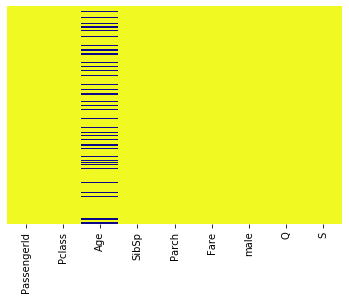

In [40]:
sns.heatmap(df_test.isnull(), cbar=False, yticklabels=False, cmap='plasma_r')

In [41]:
df_test['Age'] = df_test[['Age','Pclass']].apply(impute_age,axis=1)
df_test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,892,3,34.5,0,0,7.8292,1,1,0
1,893,3,47.0,1,0,7.0000,0,0,1
2,894,2,62.0,0,0,9.6875,1,1,0
3,895,3,27.0,0,0,8.6625,1,0,1
4,896,3,22.0,1,1,12.2875,0,0,1


In [42]:
PassengerId = df_test['PassengerId']

In [43]:
predictions = lgbc.predict(df_test.drop(['PassengerId'], axis=1))

In [44]:
Submission = pd.DataFrame({ 'PassengerId': PassengerId,
                            'Survived': predictions })
Submission.to_csv("Submission.csv", index=False)